<a href="https://colab.research.google.com/github/mdsaeed24/mdsaeed24/blob/main/Advance_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # A useful package for dealing with mathematical processes, it can deal with multi-dimensional arrays such as matrices intuitively.
import pandas as pd #a common package for viewing tabular data
import matplotlib.pyplot as plt #We will be using Matplotlib for our graphs
import sklearn.linear_model, sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
from tensorflow.keras.activations import sigmoid, linear, relu # Activation functions we will use
from tensorflow.keras.models import Model, Sequential # Different mays of constructing models, we will primarily be covering the 'functional api' which uses `Model`
from tensorflow.keras.optimizers import SGD # We will be using the SGD optimiser today, though there are other options you may want to explore (such as Adam)
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy  # We will be using TFs MSE loss function for regression and BinaryCross Entropy for classification.
from tensorflow.keras.layers import Input, Dense, Dropout # The layers we will be using to construct our network.
from tensorflow.keras.regularizers import L1, L2 # Regularisation being used in model layers
from tensorflow.keras.metrics import BinaryAccuracy # Accuracy Metric for classification
from tensorflow.keras.callbacks import EarlyStopping # Allows Early Stopping regularisation method.

In [ ]:
dataset = pd.read_csv("Comp1801CourseworkDataResit.csv")

In [ ]:
dataset


,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,28,1986.92,70,3,A Level,Private sector,Male,Scotland,27447.26
1,34,4243.54,214,11,PhD,Private sector,Male,Yorkshire and The Humber,120044.00
2,51,3160.61,220,6,PhD,Private sector,Male,East of England,53133.79
3,27,1382.38,47,0,A Level,Private sector,Male,East of England,21874.01
4,24,1369.44,63,3,PhD,Unemployed,Female,North West,21222.03
...,...,...,...,...,...,...,...,...,...
995,24,1499.83,64,4,A Level,Private sector,Male,Scotland,23512.40
996,30,15.47,55,0,Other,Private sector,Male,Northern Ireland,41449.48
997,57,685.19,140,1,Other,Unemployed,Female,West Midlands,24461.62
998,27,633.73,65,3,Degree,Private sector,Male,South East,20284.37


Random the data


In [ ]:
rng = np.random.default_rng(0)
dataset = dataset.iloc[rng.permutation(len(dataset))].reset_index(drop=True)


Converting cateorical data into numerical


In [ ]:
dataset.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,20,1479.68,94,1,A Level,Unemployed,Female,East Midlands,15256.34
1,28,651.70,52,2,A Level,Unemployed,Male,North West,17215.99
2,63,4014.53,132,7,Other,Private sector,Female,Scotland,65412.80
3,27,3920.23,59,8,A Level,Private sector,Female,South West,56271.76
4,50,3944.95,267,9,Degree,Private sector,Female,South West,64153.68


In [ ]:
dataset['WorkType'].value_counts()

Private sector    589
Unemployed        276
Public Sector     125
Self Employed      10
Name: WorkType, dtype: int64

In [ ]:
dataset['Sex'].value_counts()

Female    504
Male      496
Name: Sex, dtype: int64

In [ ]:
dataset['Education'].value_counts()

Degree     287
A Level    150
PhD        150
Other      136
Masters    113
GCSE       110
None        54
Name: Education, dtype: int64

In [ ]:
dataset['Region'].value_counts()

Scotland                    152
London                      124
South East                  120
North West                   96
East of England              87
Yorkshire and The Humber     80
South West                   73
East Midlands                71
West Midlands                63
Wales                        48
Northern Ireland             47
North East                   39
Name: Region, dtype: int64

Usin Pandas getDummies Converting categorical to numerical data

In [ ]:
# using .get_dummies function to convert
# the categorical datatype to numerical
# and storing the returned dataFrame
# in a new variable df1
worktype = pd.get_dummies(dataset['WorkType'])
sex=pd.get_dummies(dataset['Sex'])
region=pd.get_dummies(dataset['Region'])
education=pd.get_dummies(dataset['Education'])

# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
dataset = pd.concat([dataset,worktype,sex,region,education], axis=1).reindex(dataset.index)

# removing the column 'Purchased' from df
# as it is of no use now.

dataset.drop(['WorkType', 'Sex','Region' , 'Education'], inplace=True, axis=1)

# printing df
dataset.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Salary,Private sector,Public Sector,Self Employed,Unemployed,Female,...,Wales,West Midlands,Yorkshire and The Humber,A Level,Degree,GCSE,Masters,None,Other,PhD
0,20,1479.68,94,1,15256.34,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,28,651.70,52,2,17215.99,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,63,4014.53,132,7,65412.80,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,27,3920.23,59,8,56271.76,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,50,3944.95,267,9,64153.68,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Splitting the data to train and tests set

In [ ]:
X = dataset.drop("Salary", axis=1)

# Create label
Y = dataset["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 29), (200, 29), (800,), (200,))

In [ ]:
regressionscore={}

Fitting and predicting Linear regression


In [ ]:
lin_reg_model = LinearRegression()
#Now we can fit the model to our dataset
lin_reg_model.fit(X_train,y_train)
Y_pred = lin_reg_model.predict(X_test)
test_error_score =r2_score(y_test, Y_pred)
regressionscore['linear regression']=r2_score(y_test, Y_pred);
print("R squared: ", test_error_score)
meanabs = mean_absolute_error(y_test, Y_pred)
meansqrt = mean_squared_error(y_test, Y_pred)
print("Mean sqrt:",np.sqrt(meansqrt))
print("mean abs:",meanabs)
print('Train Score: ',lin_reg_model.score(X_train, y_train))
print('Test Score: ', lin_reg_model.score(X_test, y_test))

R squared:  0.8011249007354655
Mean sqrt: 19285.29118153109
mean abs: 14523.313858512127
Train Score:  0.8396761951335912
Test Score:  0.8011249007354655


<Axes: xlabel='Salary'>

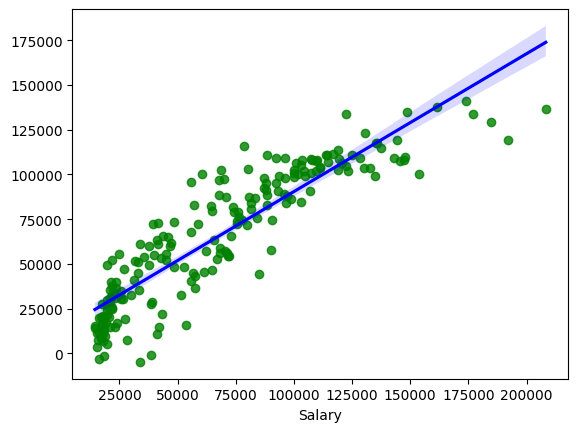

In [ ]:
sns.regplot(x=y_test, y=Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

Polynomial Regression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree=2)
x_poly= poly_regs.fit_transform(X_train)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y_train)
polytest= poly_regs.fit_transform(X_test);
Y_pred = lin_reg_2.predict(polytest)
test_error_score =r2_score(y_test, Y_pred)
regressionscore['Polynomial Regression']=r2_score(y_test, Y_pred)
print("R squared Test: ", test_error_score)
meanabs = mean_absolute_error(y_test, Y_pred)
meansqrt = mean_squared_error(y_test, Y_pred)
print("Mean sqrt:",np.sqrt(meansqrt))
print("mean abs:",meanabs)
print('Train Score: ',lin_reg_2.score(x_poly, y_train))
print('Test Score: ', lin_reg_2.score(polytest, y_test))


R squared Test:  -566283.8709876187
Mean sqrt: 32542691.961097293
mean abs: 3262867.9495707946
Train Score:  0.937090078126569
Test Score:  -566283.8709876187


Decision tree Regressor

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt



# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_1.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)

print("R squared: ", r2_score(y_test, y_1))
regressionscore['Decision tree Regression']=r2_score(y_test, y_1)
meanabs = mean_absolute_error(y_test, Y_pred)
meansqrt = mean_squared_error(y_test, Y_pred)
print("Mean sqrt:",np.sqrt(meansqrt))
print("mean abs:",meanabs)
print('Train Score: ', regr_1.score(X_train, y_train))
print('Test Score: ', regr_1.score(X_test, y_test))


R squared:  0.8591373098086883
Mean sqrt: 32542691.961097293
mean abs: 3262867.9495707946
Train Score:  1.0
Test Score:  0.8591373098086883


<Axes: >

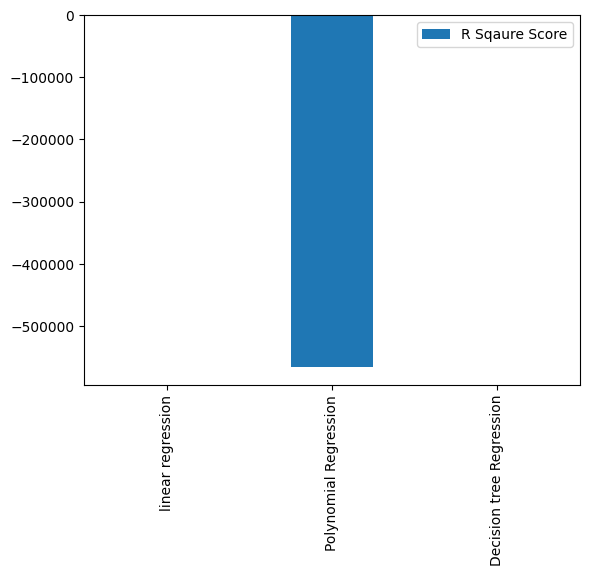

In [ ]:
model_compare = pd.DataFrame(regressionscore, index=["R Sqaure Score"])
model_compare.T.plot.bar()

Classification

In [ ]:
dataset_classification = pd.read_csv("Comp1801CourseworkDataResit.csv")

In [ ]:
rng = np.random.default_rng(0)
dataset_classification = dataset_classification.iloc[rng.permutation(len(dataset_classification))].reset_index(drop=True)

Converting the salary into binary form

In [ ]:
dataset_classification["Salary"] = dataset_classification["Salary"].apply(lambda x: 1 if x >= 40000.00 else 0)
#dataset_classification.drop(["Salary"], axis=1, inplace=True)
dataset_classification


,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,20,1479.68,94,1,A Level,Unemployed,Female,East Midlands,0
1,28,651.70,52,2,A Level,Unemployed,Male,North West,0
2,63,4014.53,132,7,Other,Private sector,Female,Scotland,1
3,27,3920.23,59,8,A Level,Private sector,Female,South West,1
4,50,3944.95,267,9,Degree,Private sector,Female,South West,1
...,...,...,...,...,...,...,...,...,...
995,28,25.17,59,0,PhD,Public Sector,Female,East of England,0
996,55,2934.87,247,10,Degree,Private sector,Male,Yorkshire and The Humber,1
997,31,3033.01,202,6,Degree,Private sector,Male,North East,1
998,33,500.50,196,4,A Level,Private sector,Female,Scotland,1


Converting categorical data to numeric

In [ ]:
worktype = pd.get_dummies(dataset_classification['WorkType'])
sex=pd.get_dummies(dataset_classification['Sex'])
region=pd.get_dummies(dataset_classification['Region'])
education=pd.get_dummies(dataset_classification['Education'])

# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
dataset_classification = pd.concat([dataset_classification,worktype,sex,region,education], axis=1).reindex(dataset_classification.index)

# removing the column 'Purchased' from df
# as it is of no use now.

dataset_classification.drop(['WorkType', 'Sex','Region' , 'Education'], inplace=True, axis=1)

# printing df

# Create feature Matrix
X = dataset_classification.drop("Salary", axis=1)

# Create label
Y = dataset_classification["Salary"]
dataset_classification.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Salary,Private sector,Public Sector,Self Employed,Unemployed,Female,...,Wales,West Midlands,Yorkshire and The Humber,A Level,Degree,GCSE,Masters,None,Other,PhD
0,20,1479.68,94,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,28,651.70,52,2,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,63,4014.53,132,7,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,27,3920.23,59,8,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,50,3944.95,267,9,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Splitting training and test data

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 29), (200, 29), (800,), (200,))

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [ ]:
model_accurancy={}
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
y_pred= classifier.predict(X_test)
model_accurancy["Logistic"] = classifier.score(X_test, Y_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89        84
           1       0.93      0.91      0.92       116

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



Confusion Matrix

In [ ]:

cm= confusion_matrix(Y_test, y_pred)
cm

array([[ 76,   8],
       [ 11, 105]])

`Decision tree classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)
y_pred= classifier.predict(X_test)
model_accurancy["Decision tree"] = classifier.score(X_test, Y_test)
cm= confusion_matrix(Y_test, y_pred)
cm


array([[ 75,   9],
       [  5, 111]])

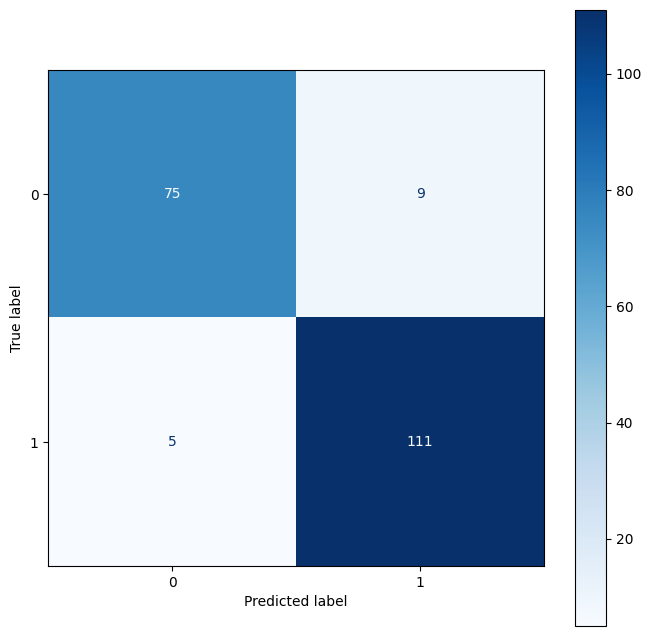

In [ ]:
# import seaborn as sns
# sns.heatmap(cm,annot=True,annot_kws={"size": 16})
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.grid(False)


Claasification Report

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        84
           1       0.93      0.96      0.94       116

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred)
f1

0.9406779661016949

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test, y_pred)
acc

0.93

In [ ]:
from sklearn.metrics import roc_curve


KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, Y_train)
#Predicting the test set result
y_pred= classifier.predict(X_test)
model_accurancy["KNN"] = classifier.score(X_test, Y_test)
cm= confusion_matrix(Y_test, y_pred)
cm

array([[ 45,  39],
       [  5, 111]])

Naive bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
model_accurancy["Naive bayes"] = classifier.score(X_test, Y_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[ 72,  12],
       [ 12, 104]])

Random forest classifier

In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, Y_train)
#Predicting the test set result
y_pred= classifier.predict(X_test)
model_accurancy["Random forest"] = classifier.score(X_test, Y_test)
cm= confusion_matrix(Y_test, y_pred)
cm

array([[ 78,   6],
       [  5, 111]])

<Axes: >

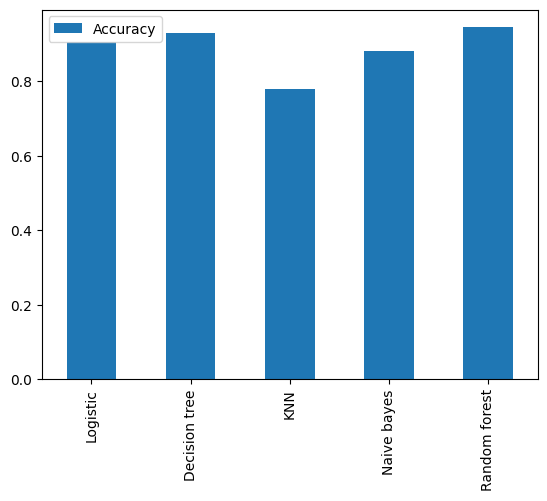

In [ ]:
model_accurancies = pd.DataFrame(model_accurancy, index=["Accuracy"])
model_accurancies.T.plot.bar()

Neural Networks

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score

In [ ]:
dataset_Neural = pd.read_csv("Comp1801CourseworkDataResit.csv")
rng = np.random.default_rng(0)
dataset_Neural = dataset_Neural.iloc[rng.permutation(len(dataset_Neural))].reset_index(drop=True)

In [ ]:
dataset_Neural["Salary"] = dataset_Neural["Salary"].apply(lambda x: 1 if x >= 40000.00 else 0)

In [ ]:
worktype = pd.get_dummies(dataset_Neural['WorkType'])
sex=pd.get_dummies(dataset_Neural['Sex'])
region=pd.get_dummies(dataset_Neural['Region'])
education=pd.get_dummies(dataset_Neural['Education'])

# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
dataset_Neural = pd.concat([dataset_Neural,worktype,sex,region,education], axis=1).reindex(dataset_Neural.index)

# removing the column 'Purchased' from df
# as it is of no use now.

dataset_Neural.drop(['WorkType', 'Sex','Region' , 'Education'], inplace=True, axis=1)

# printing df
dataset_Neural.head()
# Create feature Matrix
X = dataset_Neural.drop("Salary", axis=1)

# Create label
Y = dataset_Neural["Salary"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= X.to_numpy()
Y = Y.to_numpy()

# Split the data into training/test data
# While we have 569 pairs of a feature and target, we use 20% only for the test, not for training and validation.
# `shuffle=True` for non-time series case. You should set `shuffle=False` to avoid future data being contaminated in the training data.
X_nontest_raw, X_test_raw, Y_nontest, Y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, Y_train, Y_valid = train_test_split(X_nontest_raw, Y_nontest, test_size=0.25, shuffle=True, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)
X_test = scaler.transform(X_test_raw)


In [ ]:
alpha = 0.01
kernel_regularizer = L2(l2=alpha)

# Define the `Dense` layers.
dense_layer_1 = Dense(units=10, activation=relu, kernel_regularizer=kernel_regularizer)
output_layer = Dense(units=1, activation=sigmoid, kernel_regularizer=kernel_regularizer)

# Define the "virtual" input
input = Input(shape=X_train.shape[1:])

# Define the "virtual" output
output = dense_layer_1(input)
output = output_layer(output)

# Define the neural network model.
model = Model(inputs=[input], outputs=[output], name='logistic_regression_balanced')

# Output the summary of the model.
model.summary()


sgd = SGD(learning_rate=0.01)
ce = BinaryCrossentropy()
acc = BinaryAccuracy()
model.compile(optimizer=sgd, loss=ce, metrics=[acc])

Model: "logistic_regression_balanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_8 (Dense)             (None, 10)                300       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
6/6 [==============================] - 1s 44ms/step - loss: 0.9121 - binary_accuracy: 0.6683 - val_loss: 0.8288 - val_binary_accuracy: 0.5750
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.8885 - binary_accuracy: 0.6683 - val_loss: 0.8136 - val_binary_accuracy: 0.5800
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8671 - binary_accuracy: 0.6733 - val_loss: 0.7999 - val_binary_accuracy: 0.5950
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8476 - binary_accuracy: 0.6717 - val_loss: 0.7874 - val_binary_accuracy: 0.6000
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.8297 - binary_accuracy: 0.6767 - val_loss: 0.7759 - val_binary_accuracy: 0.6150
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.8134 - binary_accuracy: 0.6750 - val_loss: 0.7655 - val_binary_accuracy: 0.6200
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.7984 - binar

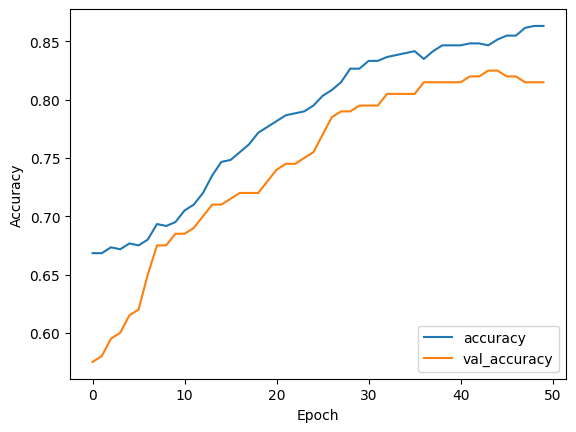

In [ ]:
m = {}
m[0] = np.sum((Y_train == 0).astype(int)) # Count how many times `0` appears in the target matrix.
m[1] = np.sum((Y_train == 1).astype(int)) # Count how many times `1` appears in the target matrix.
m_total = m[0] + m[1]
class_weight = {0: m_total / (2.0 * m[0]), 1: m_total / (2.0 * m[1])}

history = model.fit(X_train, Y_train, batch_size=100, epochs=50, validation_data=(X_valid, Y_valid), class_weight=class_weight)

# Plot validation MSE, alwys nice to have plots to help us visualise things!
plt.plot(history.history['binary_accuracy'], label='accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
Y_test_logit = model.predict(X_test)
Y_test_pred = (Y_test_logit > 0.5).astype(int)
bacc = balanced_accuracy_score(Y_test, Y_test_pred)
print('The balanced accuracy score on the test data:', bacc)

7/7 [==============================] - 0s 4ms/step
The balanced accuracy score on the test data: 0.8333333333333333


The accuracy on the test data with the selected hyperparameter: 0.81
The F1 score on the test data with the selected hyperparameter: 0.8347826086956521
Precision on test data: 0.9411764705882353
Recall on test data: 0.9411764705882353
7/7 [==============================] - 1s 3ms/step - loss: 0.6077 - binary_accuracy: 0.8100
[0.6077350974082947, 0.8100000023841858]


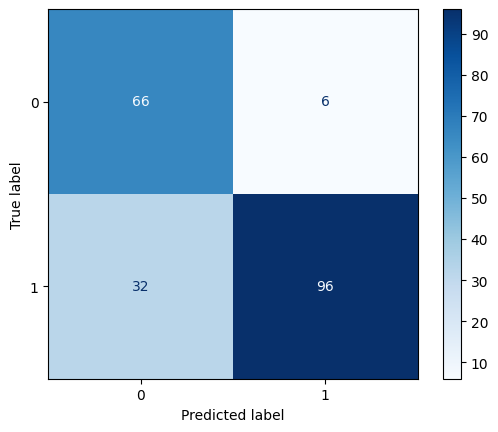

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_test_pred))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, pos_label=1)
print('The accuracy on the test data with the selected hyperparameter:', acc_test)
print('The F1 score on the test data with the selected hyperparameter:', f1_test)
pre_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Precision on test data:', pre_test)
reca_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Recall on test data:', reca_test)
print(model.evaluate(X_test, Y_test))

In [ ]:
tf.random.set_seed(42)
alpha = 0.01
kernel_regularizer = L2(l2=alpha)
# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu,kernel_regularizer=kernel_regularizer), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu,kernel_regularizer=kernel_regularizer), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid,kernel_regularizer=kernel_regularizer) # ouput layer, sigmoid activation
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_1.fit(X_train, Y_train, epochs=250, verbose=0)

In [ ]:
model_1.evaluate(X_test, Y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.9050


[0.3338130712509155, 0.9049999713897705]

<Axes: >

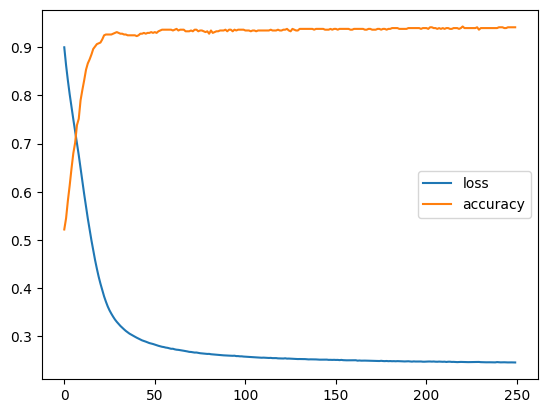

In [ ]:
pd.DataFrame(history.history).loc[:, :"accuracy"].plot()

In [ ]:
tf.random.set_seed(42)
alpha = 0.01
kernel_regularizer = L2(l2=alpha)
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=kernel_regularizer),
                               tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=kernel_regularizer),
                               tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=kernel_regularizer)])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model_2.fit(X_train, Y_train, epochs=100)
model_2.summary()

Epoch 1/100
19/19 [==============================] - 1s 3ms/step - loss: 1.4069 - accuracy: 0.7300
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 1.2045 - accuracy: 0.8100
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 1.0481 - accuracy: 0.8617
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.9225 - accuracy: 0.8917
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.8229 - accuracy: 0.8950
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.7438 - accuracy: 0.9100
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.9150
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.9233
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.9300
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.9400
Epoch 11/

In [ ]:
y_preds=model_2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
model_2.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8950


[0.39361125230789185, 0.8949999809265137]

In [ ]:
accuracy_score(Y_test, tf.round(y_preds))



0.895

In [ ]:
f1_score(Y_test, tf.round(y_preds))

0.9163346613545816

<Axes: >

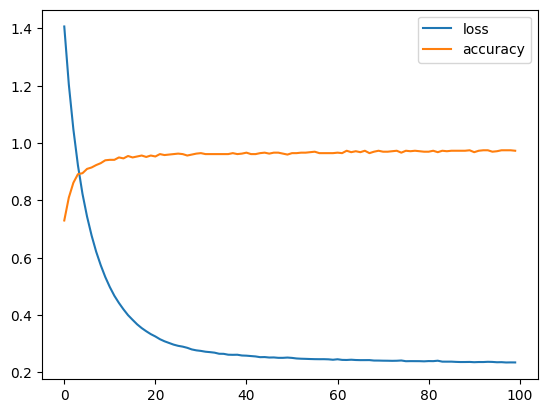

In [ ]:
pd.DataFrame(history.history).loc[:, :"accuracy"].plot()

In [ ]:

# from keras import backend as K

# def recall_m(Y_test, y_preds):
#     true_positives = K.sum(K.round(K.clip(Y_test * y_preds, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(Y_test, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(Y_test, y_preds):
#     true_positives = K.sum(K.round(K.clip(Y_test * y_preds, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_preds, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_m(Y_test, y_preds):
#     precision = precision_m(Y_test, y_preds)
#     recall = recall_m(Y_test, y_preds)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

# # compile the model
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
# model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  metrics=[precision_m, recall_m,f1_m])
# # fit the model
# # history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)
# history = model_2.fit(X_train, Y_train, epochs=100, validation_data=(X_valid, Y_valid))
# # evaluate the model
# recall,f1_score = model.evaluate(X_test, Y_test, verbose=0)
# f1_score

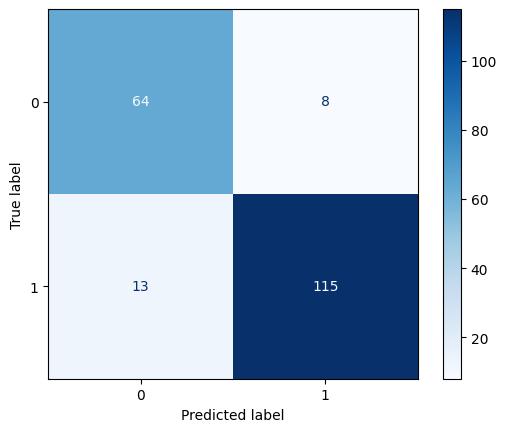

In [ ]:
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, tf.round(y_preds)))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.grid(False)

K-Means Clustering

In [ ]:
dataset_clustering = pd.read_csv("Comp1801CourseworkDataResit.csv")
rng = np.random.default_rng(0)
dataset_clustering = dataset_clustering.iloc[rng.permutation(len(dataset_clustering))].reset_index(drop=True)
dataset_clustering

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,20,1479.68,94,1,A Level,Unemployed,Female,East Midlands,15256.34
1,28,651.70,52,2,A Level,Unemployed,Male,North West,17215.99
2,63,4014.53,132,7,Other,Private sector,Female,Scotland,65412.80
3,27,3920.23,59,8,A Level,Private sector,Female,South West,56271.76
4,50,3944.95,267,9,Degree,Private sector,Female,South West,64153.68
...,...,...,...,...,...,...,...,...,...
995,28,25.17,59,0,PhD,Public Sector,Female,East of England,17586.65
996,55,2934.87,247,10,Degree,Private sector,Male,Yorkshire and The Humber,53776.98
997,31,3033.01,202,6,Degree,Private sector,Male,North East,77862.33
998,33,500.50,196,4,A Level,Private sector,Female,Scotland,56595.88


In [ ]:
X=dataset_clustering.drop(['Age','SiteTime','RecommendImpression','Education','WorkType','Sex','Region'],axis=1)
X

,SiteSpending,Salary
0,1479.68,15256.34
1,651.70,17215.99
2,4014.53,65412.80
3,3920.23,56271.76
4,3944.95,64153.68
...,...,...
995,25.17,17586.65
996,2934.87,53776.98
997,3033.01,77862.33
998,500.50,56595.88


elbow method


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

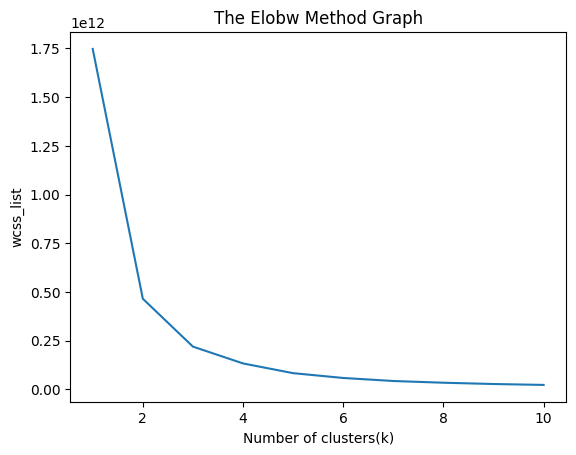

In [ ]:
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y_predict= kmeans.fit_predict(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


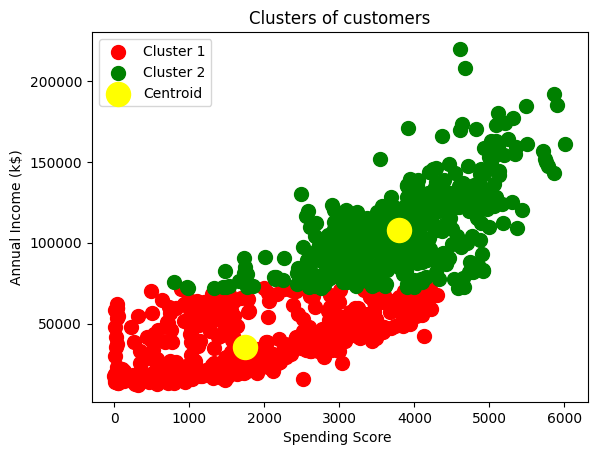

In [ ]:
X = np.array(X)
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #for first cluster
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score ')
plt.legend()
plt.show()




In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_predict= kmeans.fit_predict(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


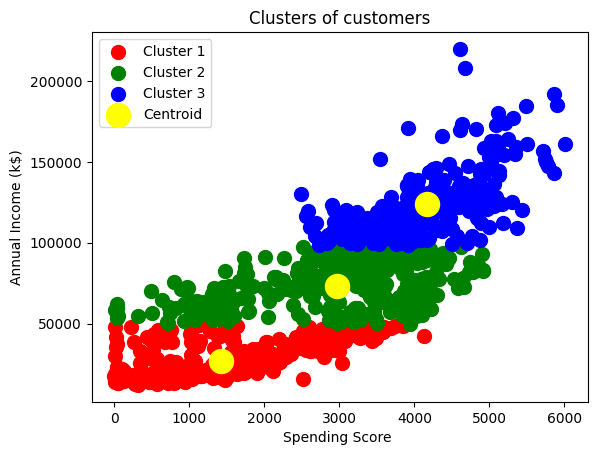

In [ ]:
X = np.array(X)
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #for first cluster
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score ')
plt.legend()
plt.show()